### Parametrización del mapeo 4.1 que aparece en el artículo  **EFFICIENT AND RELIABLE ALGORITHMS FOR THE COMPUTATION OF NON-TWIST INVARIANT CIRCLES**

In [1]:
push!(LOAD_PATH,"/home/eve/Documents/Tesis-v-1.0.2/Programas/IPM")

4-element Array{String,1}:
 "@"
 "@v#.#"
 "@stdlib"
 "/home/eve/Documents/Tesis-v-1.0.2/Programas/IPM"

In [19]:
using ParametrizacionMetodo

┌ Info: Precompiling ParametrizacionMetodo [top-level]
└ @ Base loading.jl:1260


In [20]:
using IntervalArithmetic, IntervalRootFinding
using mapeos
using PyPlot
using TaylorSeries
using ValidatedNumerics
using StaticArrays

┌ Info: Precompiling mapeos [top-level]
└ @ Base loading.jl:1260


First we can make the graphs of phase space make by Haro, de la LLave and Gonzalez.

the definition of the quadratic map 4.1
$$\bar{x} = \alpha + x + \bar{y}^{2}\\
\bar{y} = y - \frac{A}{2\pi}\sin(2\pi x)$$

In [21]:
function quadraticSM1(x,y,A,α)
    """Es una función que define una familia de mapeos cuadráticos, que 
        provienen de la modificación del mapeo estándar.
        Recibe:x,y,A donde A es un parámetro. 
    """
    y_n = y - (A/(2*pi))*sin(2*pi*x)
    x_n = mod(α + x + y_n^2,1)
    return [x_n,y_n]
    
end

quadraticSM1 (generic function with 1 method)

Function for iterate.

In [22]:
function IterarMap(f, x_ini, n)   #Definimos una función para iterar el mapeo
    
    x = x_ini[1]                      #                                     #Damos condiciones iniciales
    y = x_ini[2]                          #
    iteradosMapX = [x]
    iteradosMapY = [y]               #Definimos dos listas que tendran los valores de cada par ordenado de theta y P, y agregamos las condiciones iniciales
    for i=0:n              #iniciamos un ciclo de iteraciones donde se calculan x_n, y_n y se agregan a lalista correspodiente
        F = f(x,y)
        push!(iteradosMapX,F[1])
        push!(iteradosMapY,F[2])
        x = F[1]
        y = F[2]
    end
    return iteradosMapX, iteradosMapY  #La funcion iterados regresa las listas que corresponden a la trayectoria del
    
end

function GraficarMap(f)
    n = 40
    s = 10/250
    i=0.
    for x_i=-1:s:1
        for y_i = -pi:s:pi
            i=i+1
            p_ini=[x_i,y_i]
            a,b = IterarMap(f,p_ini,n)
            p = scatter(a[2:40],b[2:40],marker=".",s=0.1,color="gray")
            xlim(0,1)
            ylim(-0.3,0.3)

        end
    end

end

GraficarMap (generic function with 1 method)

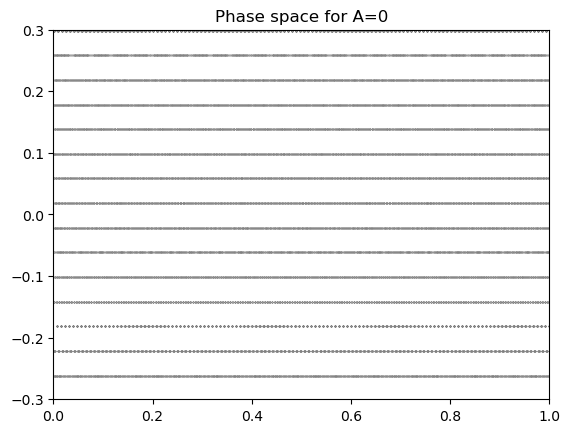

 13.783442 seconds (5.02 M allocations: 190.534 MiB, 0.57% gc time)


PyObject Text(0.5, 1.0, 'Phase space for A=0')

In [23]:
α = 0.375
f1(x,y) = quadraticSM1(x,y,0.0,α)
@time GraficarMap(f1)
title("Phase space for A=0")


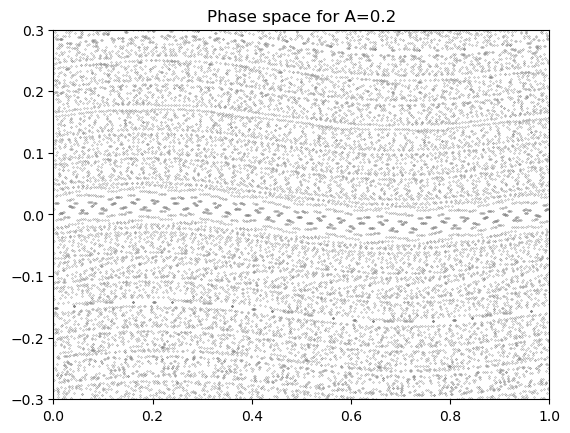

 12.828059 seconds (3.84 M allocations: 128.154 MiB, 0.35% gc time)


PyObject Text(0.5, 1.0, 'Phase space for A=0.2')

In [24]:
f2(x,y) = quadraticSM1(x,y,0.2,α)
@time GraficarMap(f2)
title("Phase space for A=0.2")

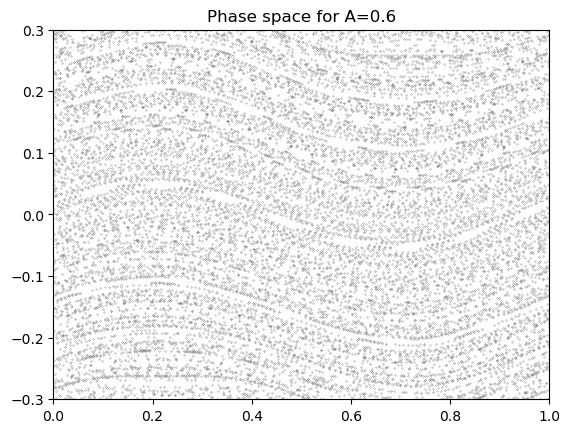

 15.168279 seconds (3.84 M allocations: 128.633 MiB, 0.34% gc time)


PyObject Text(0.5, 1.0, 'Phase space for A=0.6')

In [25]:
f3(x,y) = quadraticSM1(x,y,0.6,α)
@time GraficarMap(f3)
title("Phase space for A=0.6")

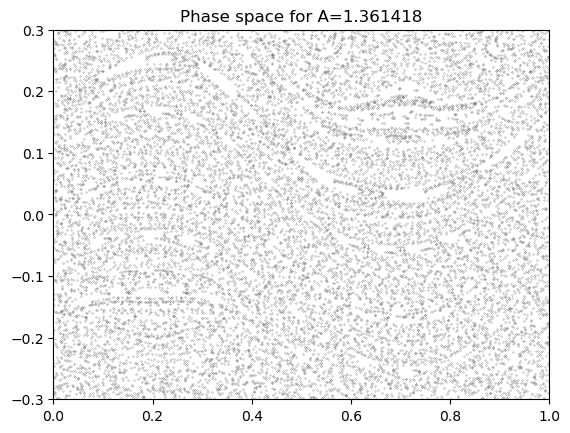

PyObject Text(0.5, 1.0, 'Phase space for A=1.361418')

In [26]:
f4(x,y) = quadraticSM1(x,y,1.361418,α)
GraficarMap(f4)
title("Phase space for A=1.361418")

Only for some combinations of $\alpha$ and $A$ exist hyperbolic fixed points. 

In [9]:
#function for evaluate the parameterization
function EvaluarP(Tiempo, paso, Pol, PuntoFijo, col)
    ValX = Float64[]
    ValY = Float64[]

    push!(ValX, mod(PuntoFijo[1],1))
    push!(ValY, PuntoFijo[2])
    for t = Tiempo[1]:paso:Tiempo[2]

        x = Float64(Pol[1](t))
        y = Float64(Pol[2](t))

        push!(ValX,x)
        push!(ValY,y)

    end

    p = plot(ValX,ValY,linestyle = "None",marker = ",",color=col)



    title("Phase space")
    xlabel(L"$x$")
    ylabel(L"$y$")
    xlim(0,1)
    ylim(0.2,0.99)


end
function GraficarEst(Tiempo,paso,f,Pol,PuntoFijo,col)
    GraficarMap(f)
    EvaluarP(Tiempo,paso,Pol,PuntoFijo,col)

end






GraficarEst (generic function with 1 method)

First parameterization.

In [10]:
α = -0.375
F1(x,y) = quadraticSM1(x,y,-1.008,α)

Orden1 = 120 #order of polynomial
p_fijo_a = [0.,sqrt(abs(α))]  #fixed point
t_1 = [-10.,10.] #time interval for evaluate the parameterization
delta_t_1 = 0.0001 #step for evaluate
Ws_1a,Es_1a,eigvec_s_1a,eigval_s_1a = Estable(F1, Orden1, p_fijo_a, t_1, delta_t_1);
Wu_1a,Eu_1a,eigvec_u_1a,eigval_u_1a = Inestable(F1, Orden1, p_fijo_a, t_1, delta_t_1);

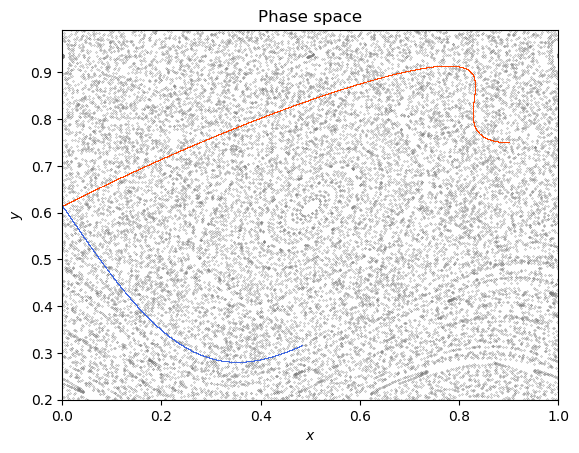

(0.2, 0.99)

In [17]:
GraficarMap(F1)
EvaluarP([-0.7,2.4],0.0001,Ws_1a,[0.,mod(sqrt(abs(α)),1)],"orangered")
EvaluarP([-1.3,1.3],0.0001,Wu_1a,[0.,sqrt(abs(α))],"royalblue")


In [12]:
delta_t_1 = 1e-3
ErrorS1a = CalculoError(F1, Ws_1a,Es_1a,[-2.,2.0],delta_t_1);
ErrorU1a = CalculoError(F1, Wu_1a,Eu_1a,[-1.3,1.3],delta_t_1);

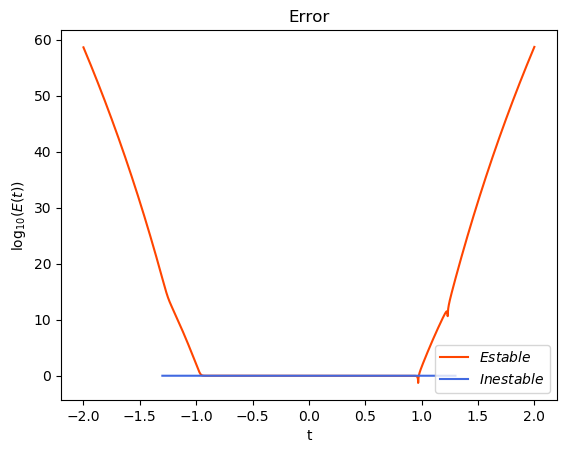

PyObject <matplotlib.legend.Legend object at 0x7f3cd838f160>

In [13]:
plot(ErrorS1a[1],log10.(ErrorS1a[2]),marker= "None", label=L"Estable",color="orangered")
plot(ErrorU1a[1],log10.(ErrorU1a[2]),marker= "None", label=L"Inestable",color="royalblue")

xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
title("Error")
#grid("on")
legend(loc="lower right",fancybox="true" )

Convergency.

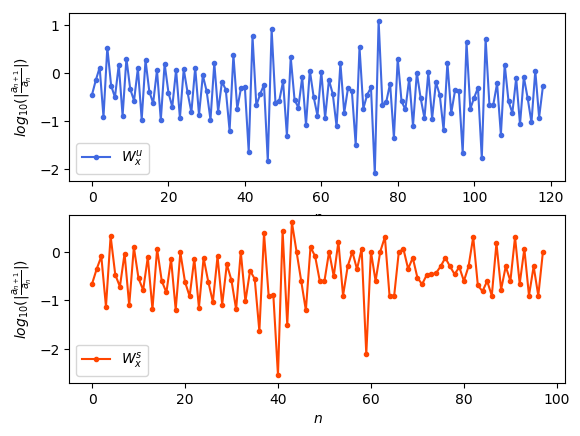

PyObject <matplotlib.legend.Legend object at 0x7f3cd7fc2470>

In [14]:

ConverS_1a=Convergencia(Ws_1a[1],Ws_1a[2])#Hadamard
ConverU_1a=Convergencia(Wu_1a[1],Wu_1a[2])


Cs1a=[log10(abs(ConverS_1a[1][i])) for i in 1:length(ConverS_1a[1])]
Cu1a=[log10(abs(ConverU_1a[1][i])) for i in 1:length(ConverU_1a[1])]

subplot(2,1,1)
plot(Cs1a,marker=".",label=L"W^{u}_{x}",color="royalblue")
xlabel(L"n")
ylabel(L"log_{10}(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )

subplot(2,1,2)
plot(Cu1a,marker=".",label=L"W^{s}_{x}",color="orangered")
xlabel(L"n")
ylabel(L"log_{10}(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )

Second parameterization.

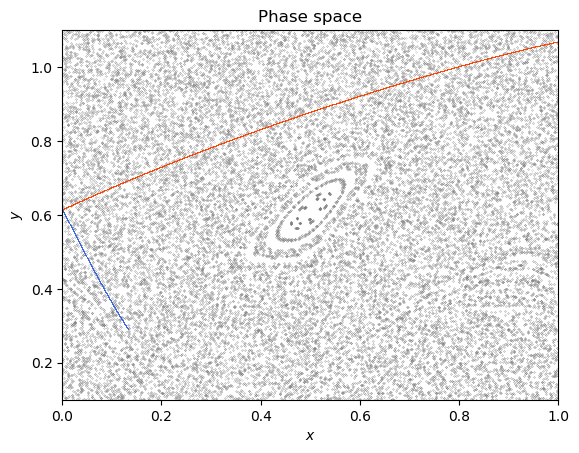

(0.1, 1.1)

In [18]:
α = -0.375
F2(x,y) = quadraticSM1(x,y,-2.008,α)

Orden1 = 120 #order of polynomial
p_fijo_b = [0.,sqrt(abs(α))]  #fixed point
t_1 = [-10.,10.] #time interval for evaluate the parameterization
delta_t_1 = 0.001 #step for evaluate
Ws_1b,Es_1b,eigvec_s_1b,eigval_s_1b = Estable(F2, Orden1, p_fijo_b, t_1, delta_t_1);
Wu_1b,Eu_1b,eigvec_u_1b,eigval_u_1b = Inestable(F2, Orden1, p_fijo_b, t_1, delta_t_1);

GraficarMap(F2)
EvaluarP([-0.1,1.1],0.0001,Ws_1b,[0.,sqrt(abs(α))],"orangered")
EvaluarP([-0.4,0.1],0.0001,Wu_1b,[0.,sqrt(abs(α))],"royalblue")
ylim(0.1,1.1)


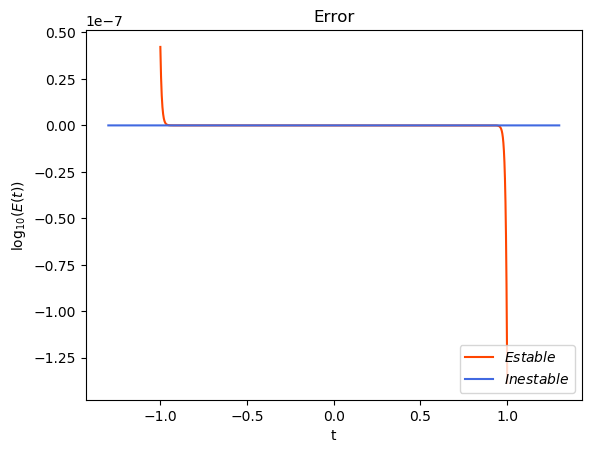

PyObject <matplotlib.legend.Legend object at 0x7f3cd6771588>

In [19]:
delta_t_1 = 1e-3
ErrorS1b = CalculoError(F2, Ws_1b,Es_1b,[-1.,1.0],delta_t_1);
ErrorU1b = CalculoError(F2, Wu_1b,Eu_1b,[-1.3,1.3],delta_t_1);

plot(ErrorS1b[1],log10.(ErrorS1b[2]),marker= "None", label=L"Estable",color="orangered")
plot(ErrorU1b[1],log10.(ErrorU1b[2]),marker= "None", label=L"Inestable",color="royalblue")

xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
title("Error")

legend(loc="lower right",fancybox="true" )

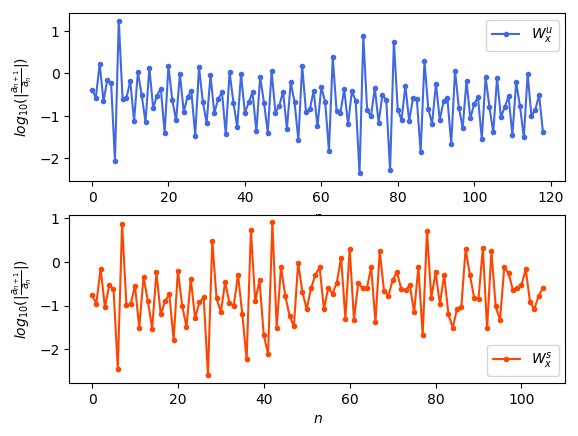

PyObject <matplotlib.legend.Legend object at 0x7f3cd35e9eb8>

In [20]:
ConverS_1b=Convergencia(Ws_1b[1],Ws_1b[2])#Hadamard
ConverU_1b=Convergencia(Wu_1b[1],Wu_1b[2])


Cs1b=[log10(abs(ConverS_1b[1][i])) for i in 1:length(ConverS_1b[1])]
Cu1b=[log10(abs(ConverU_1b[1][i])) for i in 1:length(ConverU_1b[1])]

subplot(2,1,1)
plot(Cs1b,marker=".",label=L"W^{u}_{x}",color="royalblue")
xlabel(L"n")
ylabel(L"log_{10}(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )

subplot(2,1,2)
plot(Cu1b,marker=".",label=L"W^{s}_{x}",color="orangered")
xlabel(L"n")
ylabel(L"log_{10}(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )

Another parameterization.

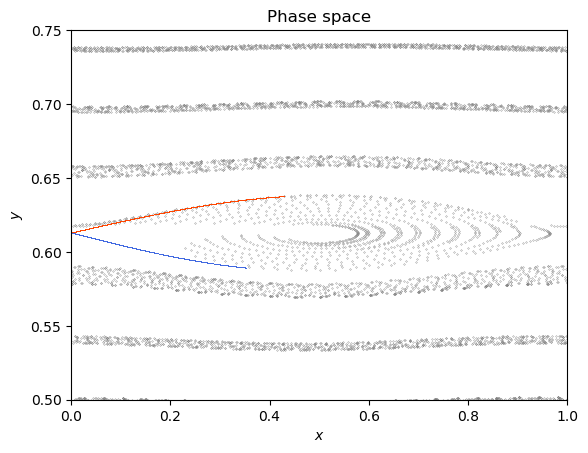

(0.5, 0.75)

In [21]:
α = -0.375
F3(x,y) = quadraticSM1(x,y,-0.008,α)

Orden1 = 120 #order of polynomial
p_fijo_c = [0.,sqrt(abs(α))]  #fixed point
t_1 = [-10.,10.] #time interval for evaluate the parameterization
delta_t_1 = 0.001 #step for evaluate
Ws_1c,Es_1c,eigvec_s_1c,eigval_s_1c = Estable(F3, Orden1, p_fijo_c, t_1, delta_t_1);
Wu_1c,Eu_1c,eigvec_u_1c,eigval_u_1c = Inestable(F3, Orden1, p_fijo_c, t_1, delta_t_1);

GraficarMap(F3)
EvaluarP([-0.1,0.5],0.0001,Ws_1c,[0.,sqrt(abs(α))],"orangered")
EvaluarP([-0.4,0.1],0.0001,Wu_1c,[0.,sqrt(abs(α))],"royalblue")
ylim(0.5,0.75)


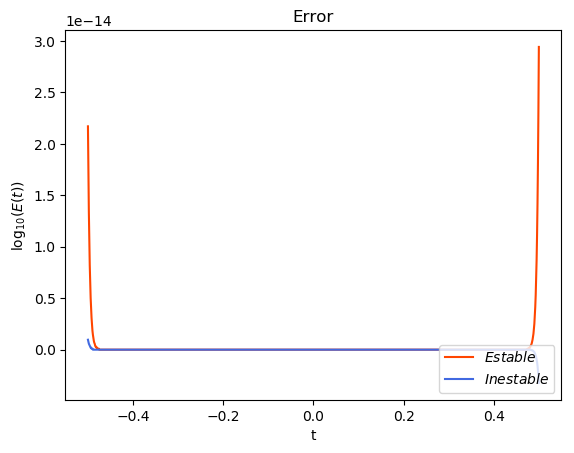

PyObject <matplotlib.legend.Legend object at 0x7f3cd614bd30>

In [22]:
delta_t_1 = 1e-3
ErrorS1c = CalculoError(F3, Ws_1c,Es_1c,[-0.5,0.5],delta_t_1);
ErrorU1c = CalculoError(F3, Wu_1c,Eu_1c,[-0.5,0.5],delta_t_1);

plot(ErrorS1c[1],log10.(ErrorS1c[2]),marker= "None", label=L"Estable",color="orangered")
plot(ErrorU1c[1],log10.(ErrorU1c[2]),marker= "None", label=L"Inestable",color="royalblue")

xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
title("Error")

legend(loc="lower right",fancybox="true" )

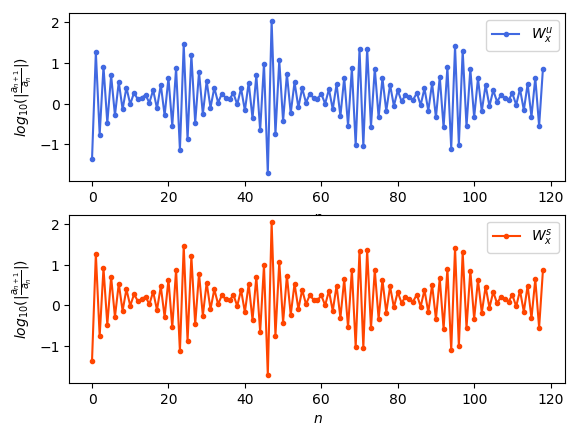

PyObject <matplotlib.legend.Legend object at 0x7f3cd4fb90b8>

In [23]:
ConverS_1c=Convergencia(Ws_1c[1],Ws_1c[2])#Hadamard
ConverU_1c=Convergencia(Wu_1c[1],Wu_1c[2])


Cs1c=[log10(abs(ConverS_1c[1][i])) for i in 1:length(ConverS_1c[1])]
Cu1c=[log10(abs(ConverU_1c[1][i])) for i in 1:length(ConverU_1c[1])]

subplot(2,1,1)
plot(Cs1c,marker=".",label=L"W^{u}_{x}",color="royalblue")
xlabel(L"n")
ylabel(L"log_{10}(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )

subplot(2,1,2)
plot(Cu1c,marker=".",label=L"W^{s}_{x}",color="orangered")
xlabel(L"n")
ylabel(L"log_{10}(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )

####  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

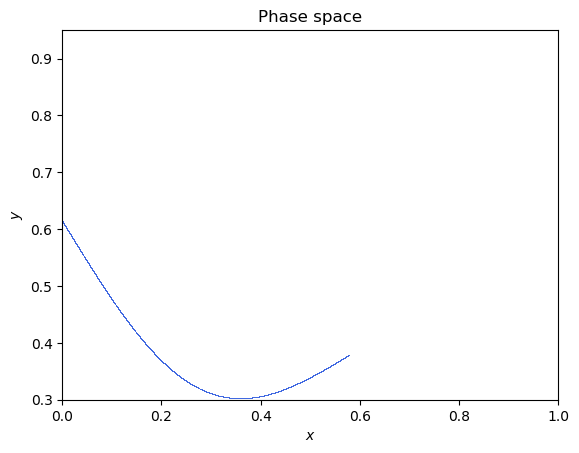

(0.3, 0.95)

In [29]:
α = -0.375
F4(x,y) = quadraticSM1(x,y,-0.9,α)

#Orden1 = 270 #order of polynomial
Orden1 = 370 #order of polynomial
p_fijo_c = [0.,sqrt(abs(α))]  #fixed point
t_1 = [-10.,10.] #time interval for evaluate the parameterization
delta_t_1 = 0.001 #step for evaluate
#Ws_1d,Es_1d,eigvec_s_1d,eigval_s_1d = Estable(F4, Orden1, p_fijo_c, t_1, delta_t_1);
Wu_1d,Eu_1d,eigvec_u_1d,eigval_u_1d = Inestable(F4, Orden1, p_fijo_c, t_1, delta_t_1);

#GraficarMap(F4)
#EvaluarP([-0.1,4.5],0.0001,Ws_1d,[0.,sqrt(abs(α))],"orangered")
EvaluarP([-1.7,0.1],0.0001,Wu_1d,[0.,sqrt(abs(α))],"royalblue")
ylim(0.3,0.95)

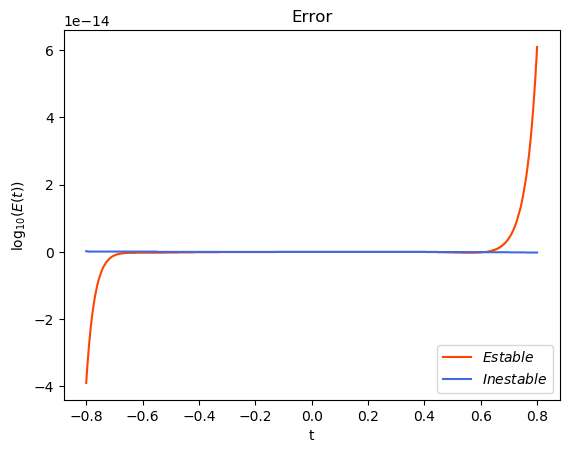

PyObject <matplotlib.legend.Legend object at 0x7f3cd57f50f0>

In [25]:
delta_t_1 = 1e-3
ErrorS1d = CalculoError(F4, Ws_1d,Es_1d,[-0.8,0.8],delta_t_1);
ErrorU1d = CalculoError(F4, Wu_1d,Eu_1d,[-0.8,0.8],delta_t_1);

plot(ErrorS1d[1],log10.(ErrorS1d[2]),marker= "None", label=L"Estable",color="orangered")
plot(ErrorU1d[1],log10.(ErrorU1d[2]),marker= "None", label=L"Inestable",color="royalblue")

xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
title("Error")

legend(loc="lower right",fancybox="true" )

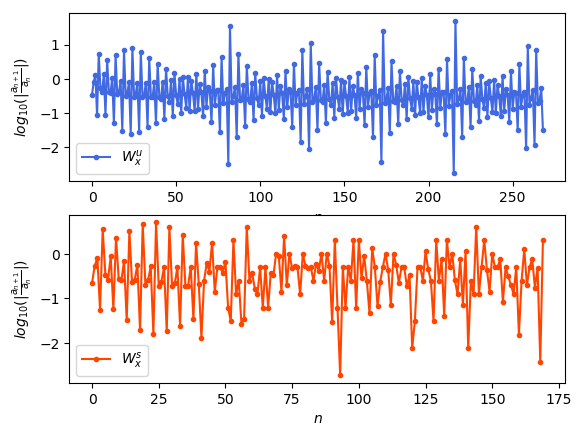

PyObject <matplotlib.legend.Legend object at 0x7fdb84059240>

In [42]:
ConverS_1d=Convergencia(Ws_1d[1],Ws_1d[2])#Hadamard
ConverU_1d=Convergencia(Wu_1d[1],Wu_1d[2])


Cs1d=[log10(abs(ConverS_1d[1][i])) for i in 1:length(ConverS_1d[1])]
Cu1d=[log10(abs(ConverU_1d[1][i])) for i in 1:length(ConverU_1d[1])]

subplot(2,1,1)
plot(Cs1d,marker=".",label=L"W^{u}_{x}",color="royalblue")
xlabel(L"n")
ylabel(L"log_{10}(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )

subplot(2,1,2)
plot(Cu1d,marker=".",label=L"W^{s}_{x}",color="orangered")
xlabel(L"n")
ylabel(L"log_{10}(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )

### >>>>>>>>>>>>>>>>>>>>>>>>>>>

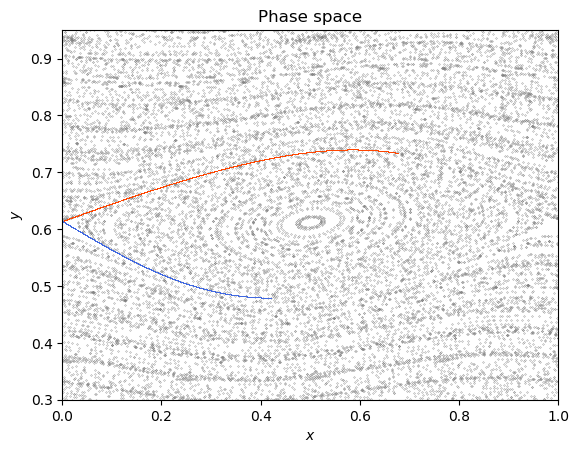

(0.3, 0.95)

In [52]:
α = -0.375
F5(x,y) = quadraticSM1(x,y,-0.2,α)

Orden1 = 70 #order of polynomial
p_fijo_c = [0.,sqrt(abs(α))]  #fixed point
t_1 = [-10.,10.] #time interval for evaluate the parameterization
delta_t_1 = 0.001 #step for evaluate
Ws_1e,Es_1e,eigvec_s_1e,eigval_s_1e = Estable(F5, Orden1, p_fijo_c, t_1, delta_t_1);
Wu_1e,Eu_1e,eigvec_u_1e,eigval_u_1e = Inestable(F5, Orden1, p_fijo_c, t_1, delta_t_1);

GraficarMap(F5)
EvaluarP([-0.1,1.0],0.0001,Ws_1e,[0.,sqrt(abs(α))],"orangered")
EvaluarP([-0.6,0.1],0.0001,Wu_1e,[0.,sqrt(abs(α))],"royalblue")
ylim(0.3,0.95)

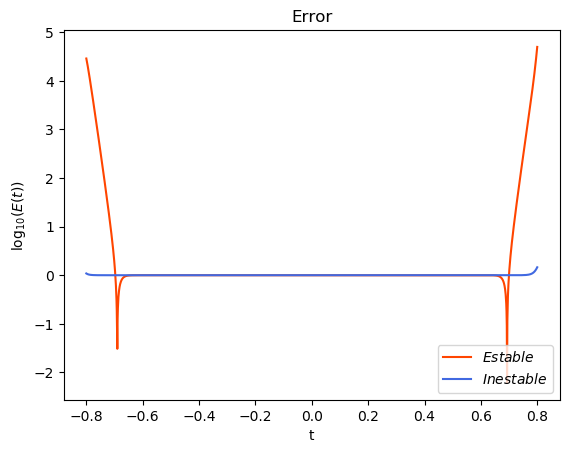

PyObject <matplotlib.legend.Legend object at 0x7fdb871f77f0>

In [46]:
delta_t_1 = 1e-3
ErrorS1e = CalculoError(F5, Ws_1e,Es_1e,[-0.8,0.8],delta_t_1);
ErrorU1e = CalculoError(F5, Wu_1e,Eu_1e,[-0.8,0.8],delta_t_1);

plot(ErrorS1e[1],log10.(ErrorS1e[2]),marker= "None", label=L"Estable",color="orangered")
plot(ErrorU1e[1],log10.(ErrorU1e[2]),marker= "None", label=L"Inestable",color="royalblue")

xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
title("Error")

legend(loc="lower right",fancybox="true" )

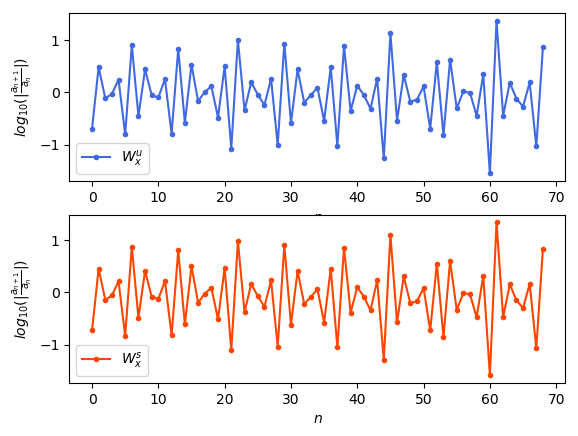

PyObject <matplotlib.legend.Legend object at 0x7fdb88528748>

In [48]:
ConverS_1e=Convergencia(Ws_1e[1],Ws_1e[2])#Hadamard
ConverU_1e=Convergencia(Wu_1e[1],Wu_1e[2])


Cs1e=[log10(abs(ConverS_1e[1][i])) for i in 1:length(ConverS_1e[1])]
Cu1e=[log10(abs(ConverU_1e[1][i])) for i in 1:length(ConverU_1e[1])]

subplot(2,1,1)
plot(Cs1e,marker=".",label=L"W^{u}_{x}",color="royalblue")
xlabel(L"n")
ylabel(L"log_{10}(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )

subplot(2,1,2)
plot(Cu1e,marker=".",label=L"W^{s}_{x}",color="orangered")
xlabel(L"n")
ylabel(L"log_{10}(|\frac{a_{n+1}}{a_{n}}|)")
legend(loc="low right",fancybox="true" )

## Intersections

In [53]:
function Interseccion(p,Ws,Wu)
    (x,y) = p
    V= SVector( Ws[1](x)-Wu[1](y), Ws[2](x)-Wu[2](y))
#    @show(p, V)
end

Interseccion (generic function with 1 method)

We define a interval for search the intersection.

In [ ]:
X = (0.0..(1.1))×(-0.1..(10.1)) # 2D IntervalBox;

In [ ]:
Intersección(X)

In [ ]:
r = roots(Intersección, X, Newton, 1e-6)

In [ ]:
using PyPlot
using PyCall
@pyimport matplotlib.patches as patch

In [ ]:
pygui(false)

GraficarEst([0.1,15.4], 0.25,estandar2, Ws_2,[0.,0.],"orangered")
GraficarEst([-0.1,-15.2],- 0.25, estandar2, Wu_2,[0.,2pi],"royalblue")
colores=["gold","darkorange","seagreen","deepskyblue","violet","reed","dodgerblue"]
for ind in eachindex(r)
    plot(Ws_2[1].([r[ind].interval[1].lo, r[ind].interval[1].hi]), 
         Ws_2[2].([r[ind].interval[1].lo, r[ind].interval[1].hi]),"o", color=colores[ind])
end
scatter([0.,0.,2pi,2pi],[0.,2pi,0.,2pi],color="limegreen")